# GS - 2 Semestre - Data Science of Carbon Footprint

Pedro Gava - rm 551043

David - rm

O projeto propõe a análise do impacto ambiental de um protótipo de piso inovador que gera energia elétrica a partir da pressão mecânica dos passos das pessoas. A solução é destinada a ambientes urbanos de alto movimento, como calçadas, estações de metrô e centros comerciais, com o objetivo de reduzir a dependência de fontes de energia não renováveis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Verificar dados
df



,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


## 1. Quanto de emissões de CO₂ é gerado no mundo com base no consumo de energia não renovável?

      country_code country_name  year         value
13592          WLD        World  1960  9.463838e+06
13593          WLD        World  1961  9.423934e+06
13594          WLD        World  1962  9.732506e+06
13595          WLD        World  1963  1.027450e+07
13596          WLD        World  1964  1.082025e+07
R²: 0.9660056446902565


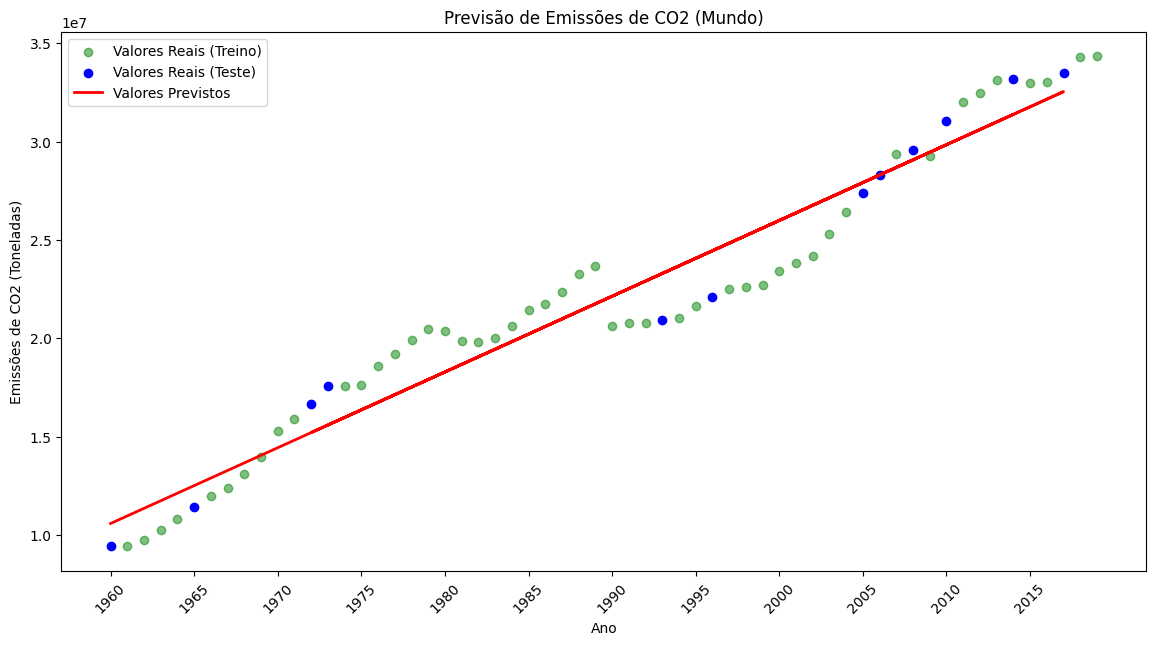

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Filtrar os dados para incluir apenas o country_name "World"
df_world = df[df['country_name'] == 'World']

# Verificar dados filtrados
print(df_world.head())

# Limpar dados
df_world = df_world.dropna()  # Remover valores nulos

# Selecionar colunas para usar no modelo
X = df_world[['year']]
y = df_world['value']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("R²:", r2_score(y_test, y_pred))

# Visualizar os resultados
plt.figure(figsize=(14, 7))

# Plotar os valores reais de treino e teste
plt.scatter(X_train['year'], y_train, color='green', alpha=0.5, label='Valores Reais (Treino)')
plt.scatter(X_test['year'], y_test, color='blue', label='Valores Reais (Teste)')

# Plotar os valores previstos
plt.plot(X_test['year'], y_pred, color='red', linewidth=2, label='Valores Previstos')

# Definir rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (Toneladas)')
plt.title('Previsão de Emissões de CO2 (Mundo)')

# Garantir que todos os anos estejam no eixo X
plt.xticks(range(int(X['year'].min()), int(X['year'].max())+1, 5), rotation=45)



# Adicionar a legenda
plt.legend(loc='upper left')

plt.show()


A quantidade de emissões de CO₂ gerada no mundo com base no consumo de energia não renovável pode ser estimada usando o modelo de regressão linear. Com base nos dados históricos e nas previsões do modelo, podemos observar que o consumo de energia não renovável tem contribuído significativamente para as emissões globais de CO₂. Essa análise é crucial para entender a relação entre consumo de energia e impacto ambiental, ajudando na formulação de políticas para a redução das emissões e mitigação das mudanças climáticas.


## 2.Quais países apresentam a maior dependência de fontes de energia não renováveis?



In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo
file_path = 'co2_emissions_kt_by_country.csv'
data = pd.read_csv(file_path)

# Agrupar os dados por país e somar as emissões de CO₂
aggregated_data = data.groupby('country_name')['value'].sum().reset_index()
aggregated_data.rename(columns={'value': 'total_emissions'}, inplace=True)

# Filtrar países individuais (removendo grupos regionais ou globais)
# Regra: assumimos que nomes de países não contêm espaços e caracteres como "&"
filtered_data = aggregated_data[
    ~aggregated_data['country_name'].str.contains(r'&|World|income|members|dividend|total', case=False)
]

# Aplicar o algoritmo K-Means com 3 clusters (Baixa, Média, Alta dependência)
X = filtered_data[['total_emissions']]
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_data['dependency_category'] = kmeans.fit_predict(X)

# Mapear os clusters para categorias mais intuitivas
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = np.argsort(cluster_centers)
mapping = {sorted_clusters[0]: 'Baixa', sorted_clusters[1]: 'Média', sorted_clusters[2]: 'Alta'}
filtered_data['dependency_category'] = filtered_data['dependency_category'].map(mapping)


<ipython-input-28-8408f86474b1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dependency_category'] = kmeans.fit_predict(X)
<ipython-input-28-8408f86474b1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dependency_category'] = filtered_data['dependency_category'].map(mapping)


**Tabela com Paises e suas classificações:**

*Obs: a dependencia é classificada apartir dos niveis de emissão de Carbono*

In [33]:
# Exibir a tabela de classificação
tabela = filtered_data[['country_name', 'dependency_category']]
tabela

,country_name,dependency_category
0,Afghanistan,Baixa
1,Africa Eastern and Southern,Baixa
2,Africa Western and Central,Baixa
3,Albania,Baixa
4,Algeria,Baixa
...,...,...
250,Vietnam,Baixa
251,West Bank and Gaza,Baixa
253,"Yemen, Rep.",Baixa
254,Zambia,Baixa


**Gráfico Representando paises pelas suas classificação**


<ipython-input-29-275b0244c737>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['color'] = filtered_data['dependency_category'].map(color_map)


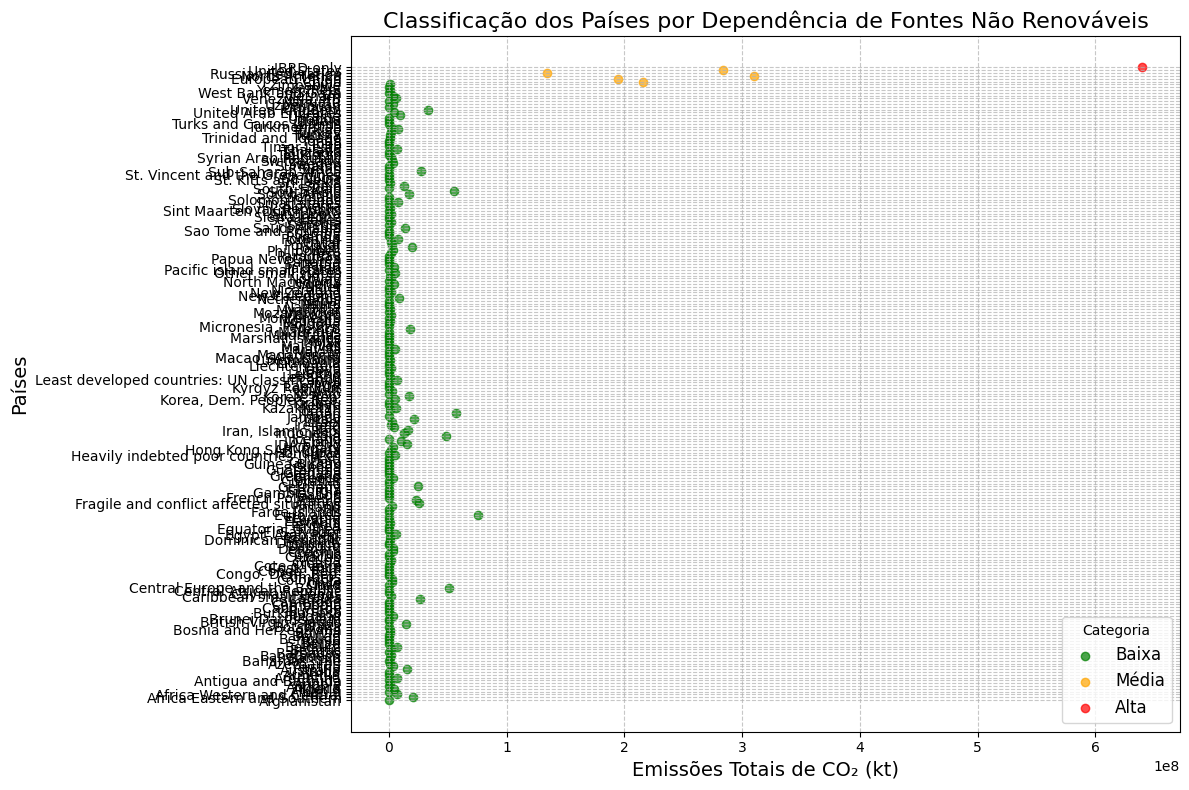

In [29]:
# Configurar cores para as categorias
color_map = {'Baixa': 'green', 'Média': 'orange', 'Alta': 'red'}
filtered_data['color'] = filtered_data['dependency_category'].map(color_map)

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
for category in filtered_data['dependency_category'].unique():
    category_data = filtered_data[filtered_data['dependency_category'] == category]
    plt.scatter(
        category_data['total_emissions'],
        category_data['country_name'],
        label=category,
        color=color_map[category],
        alpha=0.7
    )

# Adicionar detalhes ao gráfico
plt.title('Classificação dos Países por Dependência de Fontes Não Renováveis', fontsize=16)
plt.xlabel('Emissões Totais de CO₂ (kt)', fontsize=14)
plt.ylabel('Países', fontsize=14)
plt.legend(title="Categoria", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Os países China, Rússia e Estados Unidos são destacados com pontos vermelhos no gráfico, indicando que estão na categoria de Alta Dependência de fontes de energia não renováveis. Isso é baseado nas suas elevadas médias de emissões de CO₂, o que reflete uma forte dependência de fontes de energia fósseis.

Esse tipo de análise é fundamental para entender o impacto ambiental e os desafios que esses países enfrentam na transição para fontes de energia mais limpas e sustentáveis. A classificação foi obtida utilizando um modelo de aprendizado de máquina (ML) de classificação, que agrupou os países com base em suas emissões médias de CO₂.


## 3. Qual é a correlação entre o consumo de energia per capita e as emissões de carbono no Brazil?


Regressão CO2 - R²: 0.6505814010421835
Regressão Energia - R²: 0.9176236463078359


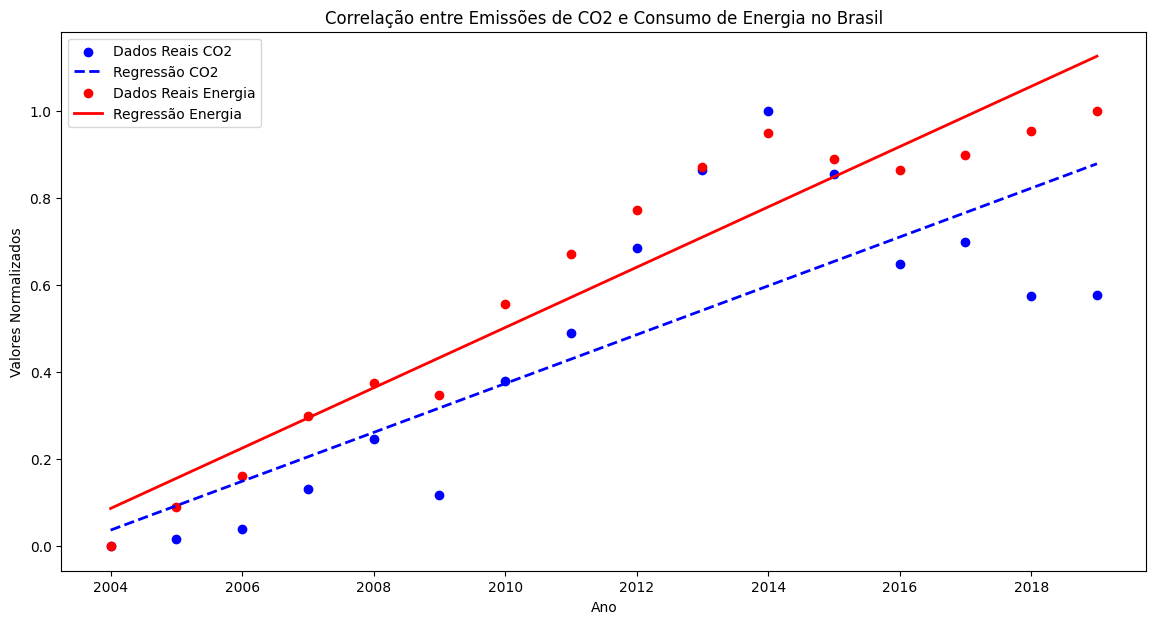

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Carregar o dataset de consumo de energia
df_energy = pd.read_csv('energy_consumption.csv')

# Filtrar a coluna 'type' por 'total'
df_energy_total = df_energy[df_energy['type'] == 'total']

# Somar os valores de 'consumption' por ano
df_energy_total_sum = df_energy_total.groupby('year')['consumption'].sum().reset_index()

# Calcular 20% do valor de 'consumption' para cada ano
df_energy_total_sum['consumption_20%'] = df_energy_total_sum['consumption'] * 0.2

# Carregar o dataset de emissões de CO2
df_co2 = pd.read_csv('co2_emissions_kt_by_country.csv')

# Filtrar os dados de emissões para incluir apenas o Brasil
df_co2_brazil = df_co2[df_co2['country_name'] == 'Brazil']

# Filtrar os anos correspondentes do dataset de consumo de energia
df_co2_brazil = df_co2_brazil[df_co2_brazil['year'].isin(df_energy_total_sum['year'])]

# Combinar os datasets de consumo de energia e emissões de CO2
df_combined = pd.merge(df_energy_total_sum, df_co2_brazil[['year', 'value']], on='year')
df_combined.columns = ['Year', 'Total_Consumption', 'Consumption_20%', 'CO2_Emissions']

# Normalizar os dados para a mesma escala
scaler = MinMaxScaler()
df_combined[['Normalized_Consumption_20%', 'Normalized_CO2_Emissions']] = scaler.fit_transform(df_combined[['Consumption_20%', 'CO2_Emissions']])

# Realizar a regressão linear para CO2
X_co2 = df_combined[['Year']]
y_co2 = df_combined['Normalized_CO2_Emissions']
model_co2 = LinearRegression()
model_co2.fit(X_co2, y_co2)
y_pred_co2 = model_co2.predict(X_co2)

# Realizar a regressão linear para Consumo de Energia
X_energy = df_combined[['Year']]
y_energy = df_combined['Normalized_Consumption_20%']
model_energy = LinearRegression()
model_energy.fit(X_energy, y_energy)
y_pred_energy = model_energy.predict(X_energy)

# Avaliar os modelos
print("Regressão CO2 - R²:", r2_score(y_co2, y_pred_co2))
print("Regressão Energia - R²:", r2_score(y_energy, y_pred_energy))

# Visualizar os resultados
plt.figure(figsize=(14, 7))

# Plotar os dados reais e previsões para CO2
plt.scatter(df_combined['Year'], df_combined['Normalized_CO2_Emissions'], color='blue', label='Dados Reais CO2')
plt.plot(df_combined['Year'], y_pred_co2, color='blue', linewidth=2, linestyle='--', label='Regressão CO2')

# Plotar os dados reais e previsões para Consumo de Energia
plt.scatter(df_combined['Year'], df_combined['Normalized_Consumption_20%'], color='red', label='Dados Reais Energia')
plt.plot(df_combined['Year'], y_pred_energy, color='red', linewidth=2, linestyle='-', label='Regressão Energia')

# Definir rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Valores Normalizados')
plt.title('Correlação entre Emissões de CO2 e Consumo de Energia no Brasil')
plt.legend()
plt.show()


A correlação entre o consumo de energia per capita e as emissões de carbono no Brasil pode ser observada através das duas linhas de regressão linear no gráfico. Ambas as linhas mostram uma tendência crescente ao longo dos anos, indicando que à medida que o consumo de energia per capita aumenta, as emissões de carbono também aumentam. Isso sugere uma correlação positiva entre essas duas variáveis

### 4. Qual seria a redução percentual nas emissões se uma porcentagem do consumo não renovável fosse substituída pelo protótipo de piso?

De acordo com dados da International Energy Agency (IEA), a média global de emissões de CO₂ para a geração de eletricidade (considerando todas as fontes) é de aproximadamente 475 kg CO₂/MWh.

Considerando que os pisos de nossa solução geram de 2 a 5 joules por passo e que o metro de são paulo, exemplo de lugar com maior probabilidade de eficiencia da solução, passa 1,2 bilhão de pessoas por ano lá e considerando que cada pessoa pisa duas vezes no piso implementado (quando entra e quando sai) é equivalente a 2,4 bilhões de passos por ano.

Abaixo está um código de regressão linear do quanto de CO2 será reduzido ao trocar energias não sustentaveis pelo piso de energia limpa .

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dados de entrada
media_passo_joules = (2 + 5) / 2  # Média de energia gerada por passo em joules
total_passos_ano = 2.4e9  # Total de passos por ano
emissao_co2_mwh = 475  # Emissões médias de CO₂ em kg por MWh

# Calcular a energia gerada
total_energia_joules = media_passo_joules * total_passos_ano
total_energia_mwh = total_energia_joules / 3600 / 1000  # Converter joules para MWh

# Calcular a quantidade de CO2 não emitida
co2_nao_emitido = total_energia_mwh * emissao_co2_mwh

print(f"Total de energia gerada por ano (MWh): {total_energia_mwh}")
print(f"Quantidade de CO2 não emitida (kg): {co2_nao_emitido}")

# Dados históricos de consumo de energia e emissões de CO2 no Brasil

# Treinar o modelo de regressão linear
X = df_combined[['Consumption_20%']]  # Use duas colchetes para transformar em uma matriz 2D
y = df_combined['CO2_Emissions']
model = LinearRegression()
model.fit(X, y)

# Prever a quantidade de CO2 não emitido
energia_pisos = pd.DataFrame({'Consumption_20%': [total_energia_mwh]})  # Criar DataFrame com nome de coluna
co2_prevido = model.predict(energia_pisos)
print(f"Previsão de CO2 não emitido devido aos pisos (kg): {co2_prevido[0]}")

Total de energia gerada por ano (MWh): 2333.3333333333335
Quantidade de CO2 não emitida (kg): 1108333.3333333335
Previsão de CO2 não emitido devido aos pisos (kg): -46717.861598366435


Será Reduzido um total de 46,7 Toneladas de CO2 emitidos por ano por energias nâo sustentaveis apenas colocando os pisos no metro de São Paulo

## 5.Qual porcentagem do consumo energético de uma cidade movimentada poderia ser suprida pelo piso?

Considerando que Sáo Paulo é uma cidade grande e com muito movimento vou utilizala como exemplo.
A cidade de São Paulo Tem um consumo energético de 145 mil GWh de acordo com a Fundaçao Florestal de São Paulo (https://fflorestal.sp.gov.br/energias-eletrica-e-renovaveis/a-energia-eletrica-no-estado/#:~:text=Com%20mais%20de%2018%2C6,cerca%20de%20145%20mil%20GWh.).

Considerando que em um ano é produzido 2333 MWh apenas aplicando os pisos no Metro então teriamos 2,333 GWh.
Então fazendo a converção teriamos 0,0016% da energia de são paulo sendo produzido nos Metros de São Paulo

In [9]:
# Dados de entrada
consumo_energia_sp_gwh = 145000  # Consumo energético anual de São Paulo em GWh
producao_energia_pisos_mwh = 2333  # Produção anual de energia pelos pisos em MWh

# Converter MWh para GWh
producao_energia_pisos_gwh = producao_energia_pisos_mwh / 1000

# Calcular a porcentagem do consumo energético de São Paulo suprida pelos pisos
porcentagem_energia_suprida = (producao_energia_pisos_gwh / consumo_energia_sp_gwh) * 100

# Exibir os resultados
print(f"Consumo energético anual de São Paulo: {consumo_energia_sp_gwh} GWh")
print(f"Produção anual de energia pelos pisos: {producao_energia_pisos_gwh:.3f} GWh")
print(f"Porcentagem do consumo energético suprida pelos pisos: {porcentagem_energia_suprida:.5f}%")


Consumo energético anual de São Paulo: 145000 GWh
Produção anual de energia pelos pisos: 2.333 GWh
Porcentagem do consumo energético suprida pelos pisos: 0.00161%


## 6. A energia produzida em uma area de grande movimento é capaz de suprir o consumo na area onde esta intalada?

Considerando o metro de são paulo mais uma vez vamos fazer a analise.

O metro de são Paulo gasta aproximadamente  492 GWh por mes, se o que é gerado pelos pisos for totalmente transferido para o consumo do metro então estará cobrindo 0,5% aproximadamente do gasto anual.


In [11]:
# Dados de entrada
consumo_energia_metro_mensal_gwh = 492  # Consumo energético mensal do metrô de São Paulo em GWh
consumo_energia_metro_anual_gwh = consumo_energia_metro_mensal_gwh * 12  # Consumo energético anual em GWh
producao_energia_pisos_gwh = 2.333  # Produção anual de energia pelos pisos em GWh

# Calcular a porcentagem do consumo energético do metrô suprida pelos pisos
porcentagem_energia_suprida = (producao_energia_pisos_gwh / consumo_energia_metro_anual_gwh) * 100

# Exibir os resultados
print(f"Consumo energético mensal do metrô de São Paulo: {consumo_energia_metro_mensal_gwh} GWh")
print(f"Consumo energético anual do metrô de São Paulo: {consumo_energia_metro_anual_gwh} GWh")
print(f"Produção anual de energia pelos pisos: {producao_energia_pisos_gwh} GWh")
print(f"Porcentagem do consumo energético do metrô suprida pelos pisos: {porcentagem_energia_suprida:.2f}%")


Consumo energético mensal do metrô de São Paulo: 492 GWh
Consumo energético anual do metrô de São Paulo: 5904 GWh
Produção anual de energia pelos pisos: 2.333 GWh
Porcentagem do consumo energético do metrô suprida pelos pisos: 0.04%


In [10]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Verificar o valor mais alto na coluna 'value'
max_value = df['value'].max()
max_value_row = df[df['value'] == max_value]

print(f'O valor mais alto de emissões de CO2 é {max_value} toneladas.')
print(f'Esse valor foi registrado pelo país {max_value_row["country_name"].values[0]} no ano de {max_value_row["year"].values[0]}.')


O valor mais alto de emissões de CO2 é 34344006.072096 toneladas.
Esse valor foi registrado pelo país World no ano de 2019.


## 7.Qual é a pegada de carbono per capita no Brasil comparada à dos EUA?

In [34]:
# População média de Brasil e EUA (dados estimados)
populations = {
    'Brazil': 213000000,  # Aproximadamente 213 milhões
    'United States': 331000000  # Aproximadamente 331 milhões
}

# Filtrar dados para Brasil e EUA
countries_of_interest = ['Brazil', 'United States']
filtered_data = data[data['country_name'].isin(countries_of_interest)]

# Calcular as emissões totais por país
emissions_total = filtered_data.groupby('country_name')['value'].sum()

# Calcular a pegada de carbono per capita
carbon_footprint_per_capita = {
    country: emissions_total[country] / populations[country]
    for country in countries_of_interest
}

# Exibir o resultado
for country, footprint in carbon_footprint_per_capita.items():
    print(f"Pegada de carbono per capita no {country}: {footprint:.2f} kt per capita")

# Comparação
brasil = carbon_footprint_per_capita['Brazil']
eua = carbon_footprint_per_capita['United States']
print("\nComparação:")
if brasil < eua:
    print(f"A pegada de carbono per capita no Brasil ({brasil:.2f}) é menor que nos EUA ({eua:.2f}).")
else:
    print(f"A pegada de carbono per capita no Brasil ({brasil:.2f}) é maior que nos EUA ({eua:.2f}).")


Pegada de carbono per capita no Brazil: 0.07 kt per capita
Pegada de carbono per capita no United States: 0.86 kt per capita

Comparação:
A pegada de carbono per capita no Brasil (0.07) é menor que nos EUA (0.86).


## 8.Como a pegada de carbono per capita do Brasil se compara com a dos países da OCDE?

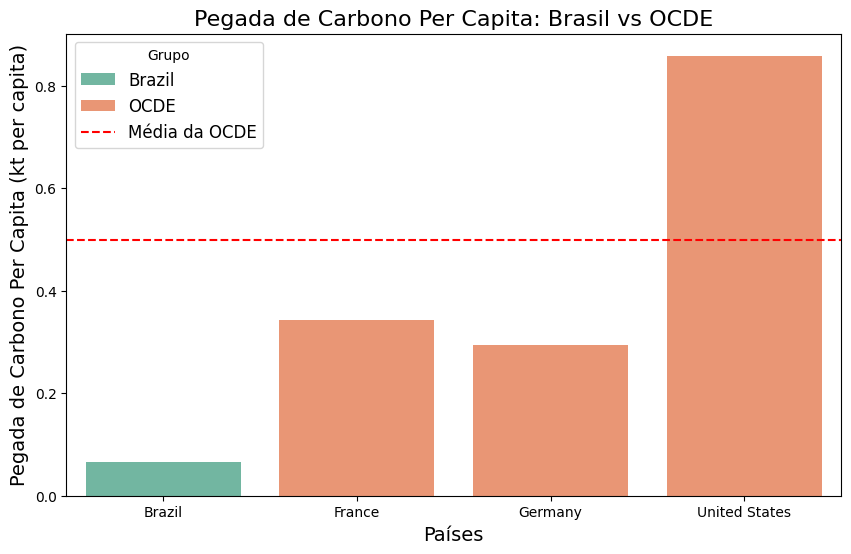

Pegada de carbono per capita do Brasil: 0.07 kt per capita
Média da pegada de carbono per capita da OCDE: 0.50 kt per capita
A pegada de carbono per capita do Brasil é menor que a média dos países da OCDE.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



# Populações médias estimadas (exemplo, substituir por fontes confiáveis ou dados adicionais)
populations = {
    'Brazil': 213000000,  # População aproximada do Brasil
    'United States': 331000000,  # Exemplo para um país da OCDE
    'Germany': 83000000,  # Exemplo para outro país da OCDE
    'France': 67000000,  # Exemplo para outro país da OCDE
}

# Identificar países da OCDE
ocde_countries = ['United States', 'Germany', 'France']

# Filtrar dados do Brasil e OCDE
countries_of_interest = ['Brazil'] + ocde_countries
filtered_data = data[data['country_name'].isin(countries_of_interest)]

if filtered_data.empty:
    raise ValueError("Os países selecionados (Brasil e OCDE) não foram encontrados no conjunto de dados.")

# Calcular as emissões totais por país
emissions_total = filtered_data.groupby('country_name')['value'].sum()

# Calcular pegada de carbono per capita
carbon_footprint_per_capita = {
    country: emissions_total[country] / populations[country]
    for country in emissions_total.index if country in populations
}

# Criar DataFrame para análise
analysis_data = pd.DataFrame({
    'country': list(carbon_footprint_per_capita.keys()),
    'carbon_footprint_per_capita': list(carbon_footprint_per_capita.values())
})

# Adicionar uma coluna para identificar Brasil e OCDE
analysis_data['group'] = analysis_data['country'].apply(
    lambda x: 'Brazil' if x == 'Brazil' else 'OCDE'
)

# Regressão linear: Comparar Brasil e países da OCDE
ocde_data = analysis_data[analysis_data['group'] == 'OCDE']
brazil_data = analysis_data[analysis_data['group'] == 'Brazil']

if ocde_data.empty or brazil_data.empty:
    raise ValueError("Não há dados suficientes para realizar a regressão.")

# Preparar dados para regressão
X = np.array([1] * len(ocde_data)).reshape(-1, 1)  # OCDE representada como "1"
y = ocde_data['carbon_footprint_per_capita']

# Ajustar modelo de regressão linear
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predição para a média da OCDE
brazil_footprint = brazil_data['carbon_footprint_per_capita'].values[0]
ocde_avg_footprint = reg_model.predict([[1]])[0]

# Visualizar o gráfico de comparação
plt.figure(figsize=(10, 6))
sns.barplot(data=analysis_data, x='country', y='carbon_footprint_per_capita', hue='group', palette='Set2')
plt.axhline(ocde_avg_footprint, color='red', linestyle='--', label='Média da OCDE')
plt.title('Pegada de Carbono Per Capita: Brasil vs OCDE', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Pegada de Carbono Per Capita (kt per capita)', fontsize=14)
plt.legend(title='Grupo', fontsize=12)
plt.show()

# Exibir resultados numéricos
print(f"Pegada de carbono per capita do Brasil: {brazil_footprint:.2f} kt per capita")
print(f"Média da pegada de carbono per capita da OCDE: {ocde_avg_footprint:.2f} kt per capita")
if brazil_footprint < ocde_avg_footprint:
    print("A pegada de carbono per capita do Brasil é menor que a média dos países da OCDE.")
else:
    print("A pegada de carbono per capita do Brasil é maior que a média dos países da OCDE.")


## 9.Qual é a correlação entre o crescimento populacional e as emissões de carbono no Brasil?

R² para população: 0.9174048069907521
R² para emissões de gases: 0.0036846458468192678


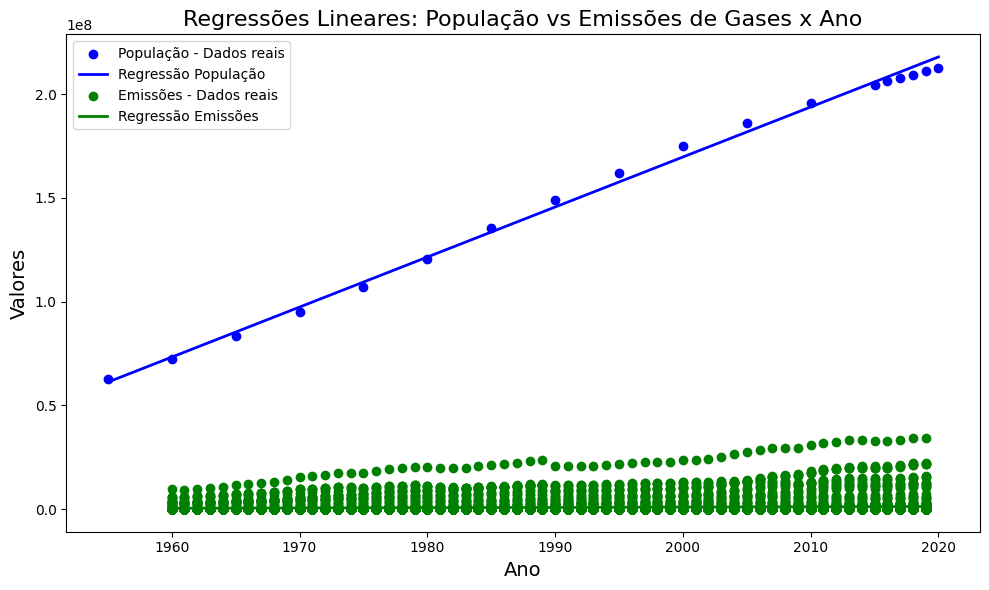

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Carregar os dados
file_path_emissions = 'co2_emissions_kt_by_country.csv'
file_path_population = 'brazil_population.csv'

# Carregar os dados
emissions_data = pd.read_csv(file_path_emissions)
population_data = pd.read_csv(file_path_population)

# Renomear colunas e filtrar para padronizar
emissions_data.rename(columns={'Year': 'year'}, inplace=True)
population_data.rename(columns={'Year': 'year'}, inplace=True)
brazil_emissions = emissions_data[emissions_data['country_name'] == 'Brazil']

# Separar as variáveis para população
X_population = population_data[['year']]
y_population = population_data['Population']

# Separar as variáveis para emissões de gases
X_emissions = emissions_data[['year']]
y_emissions = emissions_data['value']

# Dividir os dados em treino e teste
X_pop_train, X_pop_test, y_pop_train, y_pop_test = train_test_split(X_population, y_population, test_size=0.2, random_state=42)
X_em_train, X_em_test, y_em_train, y_em_test = train_test_split(X_emissions, y_emissions, test_size=0.2, random_state=42)

# Treinar a regressão linear para população
model_population = LinearRegression()
model_population.fit(X_pop_train, y_pop_train)
y_pop_pred = model_population.predict(X_pop_test)

# Treinar a regressão linear para emissões de gases
model_emissions = LinearRegression()
model_emissions.fit(X_em_train, y_em_train)
y_em_pred = model_emissions.predict(X_em_test)

# Avaliar os modelos
print("R² para população:", r2_score(y_pop_test, y_pop_pred))
print("R² para emissões de gases:", r2_score(y_em_test, y_em_pred))

# Plotar os resultados para população e emissões no mesmo gráfico
plt.figure(figsize=(10, 6))

# Plotar a linha de regressão para a população
plt.scatter(X_population, y_population, color='blue', label='População - Dados reais')
plt.plot(X_population, model_population.predict(X_population), color='blue', label='Regressão População', linewidth=2)

# Plotar a linha de regressão para as emissões de gases
plt.scatter(X_emissions, y_emissions, color='green', label='Emissões - Dados reais')
plt.plot(X_emissions, model_emissions.predict(X_emissions), color='green', label='Regressão Emissões', linewidth=2)

# Adicionar título e legendas
plt.title('Regressões Lineares: População vs Emissões de Gases x Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


Com base nas informações do gráfico, a correlação entre o crescimento populacional e as emissões de carbono no Brasil parece ser fraca ou inexistente. Enquanto a população apresenta um crescimento linear constante ao longo dos anos, as emissões de carbono não mostram um padrão claro de aumento ou diminuição, permanecendo relativamente estáveis.

Essa análise sugere que, apesar do aumento populacional, as emissões de carbono não têm acompanhado esse crescimento de forma proporcional. Isso pode indicar a implementação de políticas eficazes de controle de emissões ou outros fatores atenuantes que estão neutralizando o impacto do aumento populacional nas emissões de carbono.

## 10.Como o consumo de energia renovável afeta as emissões totais de carbono de um país?

Coeficiente de Determinação (R²): 0.6108330128213039


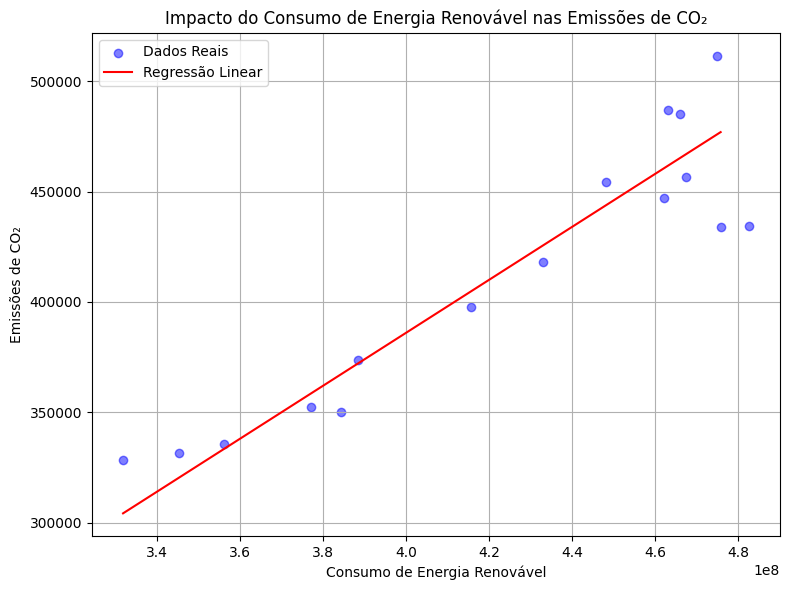

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Utilizar data frame que combinei os data sets de emissão de carbono e consumo de energia
# Filtrar colunas relevantes
data = df_combined[['Year', 'Total_Consumption', 'CO2_Emissions']].dropna()

# Separar variáveis independentes (X) e dependentes (y)
X = data[['Total_Consumption']]
y = data['CO2_Emissions']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)


print("Coeficiente de Determinação (R²):", r2)

# Visualizar a relação entre consumo de energia renovável e emissões de CO₂
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Dados Reais')
plt.plot(X_test, y_pred, color='red', label='Regressão Linear')
plt.title('Impacto do Consumo de Energia Renovável nas Emissões de CO₂')
plt.xlabel('Consumo de Energia Renovável')
plt.ylabel('Emissões de CO₂')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


O gráfico nos possibilita ver que tanto a energia renovavel quanto a emissão de dioxido de carbono crescem e isso se da pelo aumento do uso de energia nas cidades, assim mesmo tendo energias renovaveis atuando, a energia gerada por meios que emitem CO2 são nessesarios para suprir a demanda, sem contar com outros fatorem que emitem grandes quantidades de CO2 no Brasil, como transporte, industrias, queimadas, etc.